## Imports

In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Loading and Initial Inspection

In [108]:
df = pd.read_csv('../data/global_economy_indicators.csv')
df.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [109]:
df.shape

(10512, 26)

#### Datatypes of Columns

In [110]:
df.dtypes

 CountryID                                                                                      int64
 Country                                                                                       object
 Year                                                                                           int64
 AMA exchange rate                                                                            float64
 IMF based exchange rate                                                                      float64
 Population                                                                                     int64
 Currency                                                                                      object
 Per capita GNI                                                                                 int64
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           float64
 Changes in inventories                                                           

The column names are descriptive, however as a good practice, it is better to remove spaces and standardize case.

#### Information of Dataframe

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0    CountryID                                                                                  10512 non-null  int64  
 1    Country                                                                                    10512 non-null  object 
 2    Year                                                                                       10512 non-null  int64  
 3    AMA exchange rate                                                                          10512 non-null  float64
 4    IMF based exchange rate                                                                    10512 non-null  float64
 5    Population                            

#### Number of Unique Values

In [112]:
df.nunique()

 CountryID                                                                                      220
 Country                                                                                        220
 Year                                                                                            52
 AMA exchange rate                                                                             6414
 IMF based exchange rate                                                                       6251
 Population                                                                                   10498
 Currency                                                                                       153
 Per capita GNI                                                                                6479
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                           10333
 Changes in inventories                                                                        8648


#### Count of Null Values

In [113]:
df.isna().sum()

 CountryID                                                                                       0
 Country                                                                                         0
 Year                                                                                            0
 AMA exchange rate                                                                               0
 IMF based exchange rate                                                                         0
 Population                                                                                      0
 Currency                                                                                        0
 Per capita GNI                                                                                  0
 Agriculture, hunting, forestry, fishing (ISIC A-B)                                            121
 Changes in inventories                                                                       1841
 Construct

In [114]:
len(df)

10512

In [115]:
percent = pd.DataFrame(index=df.columns)
percent['null_count'] = df.isna().sum()
percent['percent_null'] = percent['null_count'] / len(df)
percent

,null_count,percent_null
CountryID,0,0.000000
Country,0,0.000000
Year,0,0.000000
AMA exchange rate,0,0.000000
IMF based exchange rate,0,0.000000
Population,0,0.000000
Currency,0,0.000000
Per capita GNI,0,0.000000
"Agriculture, hunting, forestry, fishing (ISIC A-B)",121,0.011511
Changes in inventories,1841,0.175133


The percentage of null values is not significant in majority of columns.

#### Statistics of Data

In [116]:
df.describe()

,CountryID,Year,AMA exchange rate,IMF based exchange rate,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
count,10512.000000,10512.000000,1.051200e+04,1.051200e+04,1.051200e+04,10512.000000,1.039100e+04,8.671000e+03,1.051200e+04,1.049100e+04,...,1.046000e+04,1.047000e+04,1.046900e+04,1.051200e+04,1.051200e+04,1.051200e+04,1.046300e+04,1.046300e+04,1.051200e+04,1.051200e+04
mean,431.116629,1996.262747,3.573959e+02,3.419846e+02,2.851523e+07,8965.564593,7.793212e+09,1.626543e+09,1.002199e+10,4.671176e+10,...,1.055041e+11,4.591504e+10,3.092586e+10,4.153282e+10,7.474487e+10,1.744795e+11,1.556757e+10,2.509568e+10,1.825260e+11,1.828765e+11
std,251.169090,14.900361,2.291128e+03,1.941857e+03,1.141296e+08,17070.205895,4.034349e+10,8.932353e+09,4.985596e+10,1.748857e+11,...,6.038454e+11,1.804351e+11,1.723910e+11,2.112576e+11,4.840568e+11,9.746041e+11,9.187359e+10,1.391727e+11,9.942144e+11,9.845997e+11
min,4.000000,1970.000000,4.300000e-14,4.300000e-14,4.359000e+03,34.000000,2.813900e+04,-1.510000e+11,1.577280e+05,-1.669759e+09,...,7.960260e+05,1.982159e+06,-2.484990e+05,-2.581190e+06,1.044040e+06,2.411113e+06,-6.479048e+06,2.302090e+05,3.564833e+06,2.585174e+06
25%,212.000000,1984.000000,1.000000e+00,1.000000e+00,6.330615e+05,730.000000,1.304522e+08,4.673545e+05,6.815523e+07,4.026725e+08,...,9.389897e+08,5.891469e+08,1.109497e+08,1.857038e+08,3.555891e+08,1.355670e+09,8.998828e+07,2.078732e+08,1.410772e+09,1.439217e+09
50%,430.000000,1997.000000,2.812895e+00,2.761315e+00,5.051556e+06,2316.500000,9.313674e+08,6.829635e+07,3.717701e+08,2.407906e+09,...,5.154424e+09,2.891919e+09,9.113543e+08,1.597027e+09,2.107421e+09,7.493971e+09,5.441500e+08,1.056493e+09,7.887233e+09,8.070572e+09
75%,643.000000,2009.000000,5.134316e+01,4.806684e+01,1.678862e+07,8965.750000,4.023326e+09,6.910750e+08,2.815730e+09,1.542492e+10,...,3.008905e+10,1.602312e+10,7.405364e+09,1.251358e+10,1.442130e+10,4.819144e+10,3.975893e+09,6.707456e+09,5.005789e+10,5.172596e+10
max,894.000000,2021.000000,1.116366e+05,4.200000e+04,1.425893e+09,234317.000000,1.350000e+12,2.110000e+11,1.240000e+12,3.530000e+12,...,1.590000e+13,3.400000e+12,4.870000e+12,5.780000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13


## Cleaning

#### Renaming Columns

In [117]:
"ABC ".split(" (")[0].strip(),"ABC ()".split(" (")[0]

('ABC', 'ABC')

In [118]:
# res = []
# for col in df.columns:
#     # Remove Additional Information within braces
#     tmp = col.split("(")[0].strip()
#     # Convert to Lower
#     tmp = tmp.lower()
#     # Convert spaces to underscores and remove commas
#     tmp = tmp.replace(" ", "_")
#     tmp = tmp.replace(",","")
#     res.append(tmp)
# df.columns = res

df.columns = [col.split("(")[0].strip().lower().replace(" ", "_").replace(",","").strip("_") for col in df.columns]

## Detailed EDA

#### Number of Countries

In [119]:
n_countries = df.country.nunique()
n_countries

220

#### Number of Countries every year

In [120]:
country_count = df.year.value_counts()
country_count = pd.DataFrame(country_count).reset_index()

In [121]:
country_count.sort_values(by='year')

,year,count
51,1970,187
44,1971,187
34,1972,187
35,1973,187
36,1974,187
37,1975,187
38,1976,187
39,1977,187
40,1978,187
41,1979,187


In [122]:
country_count['year']

0     1990
1     2008
2     2009
3     2010
4     2012
5     2011
6     2005
7     2006
8     2007
9     2021
10    2013
11    2015
12    2016
13    2017
14    2018
15    2019
16    2014
17    2020
18    1991
19    1992
20    1993
21    2002
22    2000
23    2001
24    2003
25    2004
26    1998
27    1999
28    1996
29    1997
30    1995
31    1994
32    1989
33    1980
34    1972
35    1973
36    1974
37    1975
38    1976
39    1977
40    1978
41    1979
42    1982
43    1981
44    1971
45    1983
46    1984
47    1985
48    1986
49    1987
50    1988
51    1970
Name: year, dtype: int64

Text(0, 0.5, 'Count')

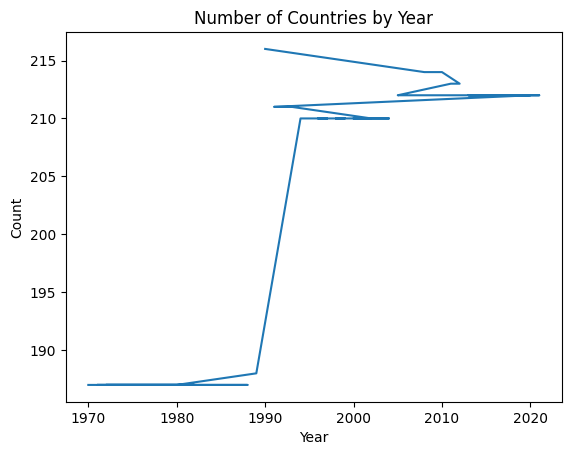

In [123]:
plt.plot(country_count['year'], country_count['count'])
plt.title('Number of Countries by Year')
plt.xlabel('Year')
plt.ylabel('Count')

#### Population by Year

In [124]:
population_df = df.groupby(by='year').sum().reset_index()

In [125]:
population_df.head()

,year,countryid,country,ama_exchange_rate,imf_based_exchange_rate,population,currency,per_capita_gni,agriculture_hunting_forestry_fishing,changes_in_inventories,...,household_consumption_expenditure,imports_of_goods_and_services,manufacturing,mining_manufacturing_utilities,other_activities,total_value_added,transport_storage_and_communication,wholesale_retail_trade_restaurants_and_hotels,gross_national_income,gross_domestic_product
0,1970,80345,Afghanistan Albania Algeria Andorra Angol...,6483.604571,6648.575252,3675645296,Afghani Lek Algerian Dinar Euro Kwanza E...,195858,3.098038e+11,4.655306e+10,...,1.953929e+12,3.841562e+11,8.512958e+11,1.012736e+12,1.036070e+12,3.289897e+12,2.572724e+11,4.608816e+11,3.403031e+12,3.411565e+12
1,1971,80345,Afghanistan Albania Algeria Andorra Angol...,6489.040049,6669.402297,3749955242,Afghani Lek Algerian Dinar Euro Kwanza E...,216964,3.257875e+11,3.459196e+10,...,2.147573e+12,4.273286e+11,9.204942e+11,1.100591e+12,1.159565e+12,3.618333e+12,2.836873e+11,5.068313e+11,3.757570e+12,3.753968e+12
2,1972,80345,Afghanistan Albania Algeria Andorra Angol...,6132.753915,6679.335293,3824140476,Afghani Lek Algerian Dinar Euro Kwanza E...,250685,3.628836e+11,3.646151e+10,...,2.465641e+12,5.012830e+11,1.061061e+12,1.268444e+12,1.340293e+12,4.174868e+12,3.295339e+11,5.867935e+11,4.325690e+12,4.325758e+12
3,1973,80345,Afghanistan Albania Algeria Andorra Angol...,5614.949960,6316.170121,3899150761,Afghani Lek Algerian Dinar Euro Kwanza E...,313673,4.659713e+11,7.067026e+10,...,2.953545e+12,6.805356e+11,1.295850e+12,1.560658e+12,1.604144e+12,5.083962e+12,3.923340e+11,7.082031e+11,5.263556e+12,5.265354e+12
4,1974,80345,Afghanistan Albania Algeria Andorra Angol...,5917.008499,6382.963568,3973861696,Afghani Lek Algerian Dinar Euro Kwanza E...,398318,4.971064e+11,1.165144e+11,...,3.329197e+12,9.542081e+11,1.437719e+12,1.817321e+12,1.806616e+12,5.751395e+12,4.406966e+11,8.070997e+11,5.960875e+12,5.963784e+12


Text(0, 0.5, 'Population')

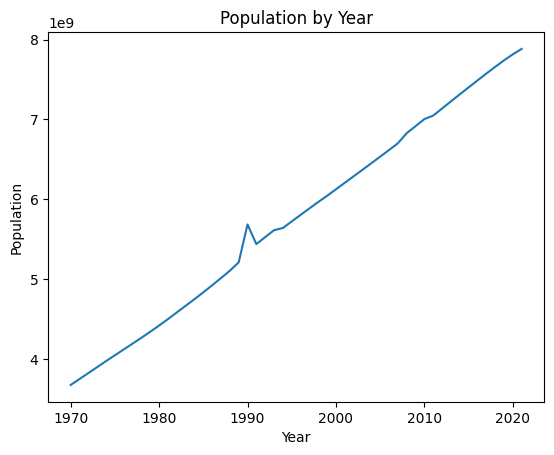

In [126]:
plt.plot(population_df['year'], population_df['population'])
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')

#### GDP of India over years

In [127]:
df['country'] = df.country.str.strip()
df.country.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

Text(0, 0.5, 'GDP')

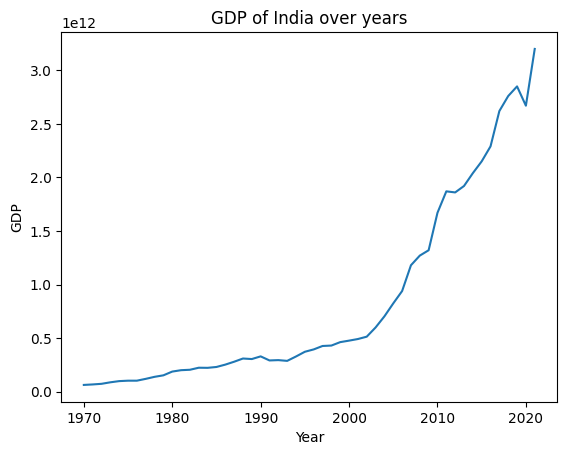

In [128]:
temp = df[df.country == 'India'].groupby(by='year').sum().reset_index()
plt.plot(temp['year'], temp['gross_domestic_product'])
plt.title('GDP of India over years')
plt.xlabel('Year')
plt.ylabel('GDP')

#### Highest Exchange Rate in 2021

In [129]:
temp = df[df.year == 2021]
temp = temp.sort_values(by='imf_based_exchange_rate', ascending=False).head(10)
temp

,countryid,country,year,ama_exchange_rate,imf_based_exchange_rate,population,currency,per_capita_gni,agriculture_hunting_forestry_fishing,changes_in_inventories,...,household_consumption_expenditure,imports_of_goods_and_services,manufacturing,mining_manufacturing_utilities,other_activities,total_value_added,transport_storage_and_communication,wholesale_retail_trade_restaurants_and_hotels,gross_national_income,gross_domestic_product
4316,364,Iran (Islamic Republic of),2021,111636.628300,42000.000000,87923432,Iranian Rial,6556,7.468803e+10,8.257894e+10,...,2.590000e+11,1.310000e+11,1.020000e+11,1.860000e+11,1.740000e+11,5.740000e+11,4.906159e+10,6.855728e+10,5.760000e+11,5.950000e+11
8729,706,Somalia,2021,24300.000000,24300.000000,17065581,Somali Shilling,444,4.033256e+09,NaN,...,1.071982e+10,6.544000e+09,1.663754e+08,2.117586e+08,8.348387e+08,6.702233e+09,6.287839e+08,7.124504e+08,7.585376e+09,7.628276e+09
8645,704,Viet Nam,2021,23159.782590,23159.782590,97468029,Dong,3564,4.598823e+10,6.552851e+09,...,2.030000e+11,3.410000e+11,9.013366e+10,1.150000e+11,8.077881e+10,3.340000e+11,2.953955e+10,4.055915e+10,3.470000e+11,3.660000e+11
4264,360,Indonesia,2021,14308.143900,14308.143900,273753191,Rupiah,4217,1.580000e+11,7.767811e+09,...,6.600000e+11,2.240000e+11,2.280000e+11,3.490000e+11,2.230000e+11,1.140000e+12,1.030000e+11,1.830000e+11,1.150000e+12,1.190000e+12
10280,860,Uzbekistan,2021,10609.464390,10609.464390,34081449,Uzbekistan Sum,2023,1.729762e+10,3.759693e+09,...,4.093720e+10,2.779484e+10,1.383049e+10,1.787148e+10,1.766255e+10,6.623770e+10,4.604506e+09,4.484444e+09,6.896017e+10,6.923890e+10
8509,694,Sierra Leone,2021,10439.425320,10439.425320,8420641,Leone,499,2.441134e+09,1.696668e+07,...,4.506014e+09,1.761847e+09,7.979089e+07,2.195285e+08,1.003100e+09,4.066837e+09,1.212939e+08,2.491725e+08,4.200435e+09,4.249234e+09
3848,324,Guinea,2021,9795.705833,9795.705833,13531906,Guinea Franc,1046,4.070368e+09,-3.137017e+08,...,9.426698e+09,8.387189e+09,1.495875e+09,4.156479e+09,2.465496e+09,1.446996e+10,6.872769e+08,2.758664e+09,1.415432e+10,1.603611e+10
5088,418,Lao People's DR,2021,9697.915789,9697.915789,7425057,Kip,2414,3.042922e+09,NaN,...,9.830633e+09,6.980929e+09,1.598385e+09,4.743081e+09,4.376714e+09,1.678691e+10,5.390849e+08,2.347205e+09,1.792224e+10,1.907441e+10
7425,600,Paraguay,2021,6774.162735,6774.162735,6703799,Guarani,5842,4.213161e+09,5.829120e+08,...,2.528791e+10,1.324991e+10,8.193707e+09,1.134459e+10,1.152364e+10,3.774290e+10,2.733363e+09,4.791348e+09,3.916233e+10,4.045839e+10
1531,116,Cambodia,2021,4098.722795,4098.722795,16589023,Riel,1523,6.058767e+09,2.666949e+08,...,2.721720e+10,2.288696e+10,4.802399e+09,5.585718e+09,4.098187e+09,2.471369e+10,1.765493e+09,3.047378e+09,2.525705e+10,2.666949e+10


Text(0.5, 1.0, 'Highest Exchange Rate in 2021 (compared to USD)')

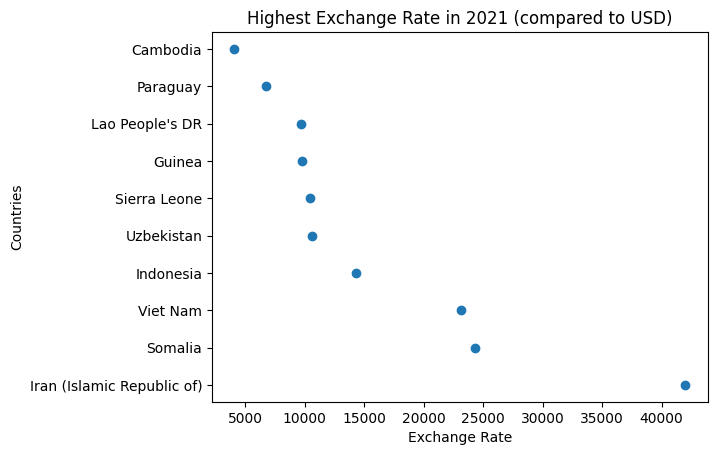

In [130]:
plt.scatter(temp.imf_based_exchange_rate, temp.country)
plt.ylabel('Countries')
plt.xlabel('Exchange Rate')
plt.title('Highest Exchange Rate in 2021 (compared to USD)')

#### Lowest Exchange Rate in 2021

In [131]:
temp = df[df.year == 2021]
temp = temp.sort_values(by='imf_based_exchange_rate', ascending=True).head(10)
temp

,countryid,country,year,ama_exchange_rate,imf_based_exchange_rate,population,currency,per_capita_gni,agriculture_hunting_forestry_fishing,changes_in_inventories,...,household_consumption_expenditure,imports_of_goods_and_services,manufacturing,mining_manufacturing_utilities,other_activities,total_value_added,transport_storage_and_communication,wholesale_retail_trade_restaurants_and_hotels,gross_national_income,gross_domestic_product
5004,414,Kuwait,2021,0.301643,0.301643,4250114,Kuwaiti Dinar,36453,5.872826e+08,NaN,...,5.298099e+10,5.120922e+10,9.670440e+09,7.125880e+10,6.307511e+10,1.550000e+11,9.844694e+09,7.106358e+09,1.550000e+11,1.370000e+11
603,48,Bahrain,2021,0.376000,0.376000,1463265,Bahraini Dinar,24990,1.142929e+08,2.103395e+09,...,1.316285e+10,2.757739e+10,6.914738e+09,1.301818e+10,1.633399e+10,3.798642e+10,2.833061e+09,2.483724e+09,3.656752e+10,3.886867e+10
6360,512,Oman,2021,0.384500,0.384500,4520471,Rial Omani,18184,1.870358e+09,-2.831384e+09,...,3.908142e+10,3.650226e+10,8.046658e+09,3.773617e+10,3.089295e+10,9.108545e+10,4.690590e+09,8.976704e+09,8.219944e+10,8.819198e+10
4764,400,Jordan,2021,0.710000,0.710000,11148278,Jordanian Dinar,4038,2.373239e+09,1.512425e+09,...,3.523204e+10,2.318307e+10,7.809859e+09,9.735211e+09,1.975352e+10,4.103099e+10,3.788732e+09,4.160563e+09,4.501141e+10,4.524366e+10
10008,826,United Kingdom,2021,0.727065,0.727065,67281039,Pound Sterling,46338,2.113154e+10,1.140063e+10,...,1.890000e+12,8.990000e+11,2.750000e+11,3.810000e+11,1.600000e+12,2.810000e+12,2.760000e+11,3.580000e+11,3.120000e+12,3.130000e+12
1739,136,Cayman Islands,2021,0.833330,0.833330,68136,Cayman Islands Dollar,61982,2.448922e+07,1.218458e+07,...,3.127214e+09,2.618831e+09,5.215846e+07,2.037922e+08,4.065180e+09,5.490147e+09,3.218264e+08,6.319501e+08,4.223197e+09,5.808612e+09
5224,428,Latvia,2021,0.845494,0.845494,1873919,Euro,20876,1.637234e+09,1.401858e+09,...,2.273233e+10,2.666022e+10,4.769524e+09,6.004492e+09,1.509286e+10,3.493736e+10,4.465545e+09,5.818383e+09,3.911935e+10,3.985350e+10
2447,196,Cyprus,2021,0.845494,0.845494,880028,Euro,29554,4.830311e+08,-3.924332e+08,...,1.684542e+10,2.377627e+10,1.618698e+09,2.178135e+09,1.369921e+10,2.501129e+10,3.596595e+09,3.505879e+09,2.600803e+10,2.840812e+10
8677,705,Slovenia,2021,0.845494,0.845494,2119410,Euro,28724,1.043199e+09,9.546820e+08,...,3.156693e+10,4.772567e+10,1.236637e+10,1.424669e+10,2.244185e+10,5.426415e+10,5.596049e+09,7.595978e+09,6.087739e+10,6.174859e+10
8593,703,Slovakia,2021,0.845494,0.845494,5447622,Euro,21124,2.031898e+09,2.933586e+09,...,6.668118e+10,1.100000e+11,2.299938e+10,2.659214e+10,4.325980e+10,1.040000e+11,1.193987e+10,1.371076e+10,1.150000e+11,1.170000e+11


Text(0.5, 1.0, 'Highest Exchange Rate in 2021 (compared to USD)')

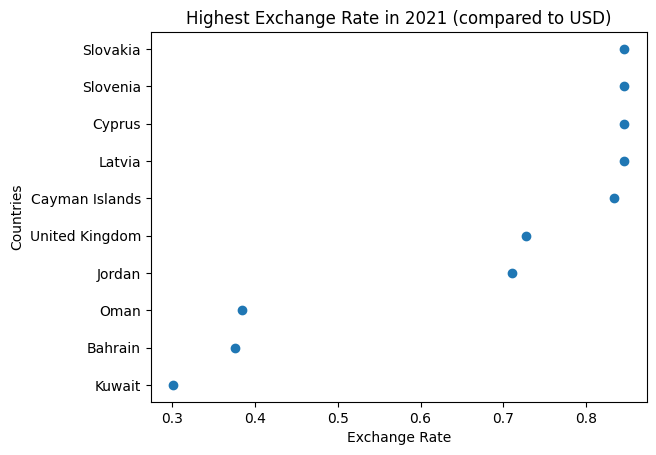

In [132]:
plt.scatter(temp.imf_based_exchange_rate, temp.country)
plt.ylabel('Countries')
plt.xlabel('Exchange Rate')
plt.title('Highest Exchange Rate in 2021 (compared to USD)')

#### Global GDP

In [133]:
temp = df.groupby(by='year').sum()['gross_domestic_product'].reset_index()
temp.head()

,year,gross_domestic_product
0,1970,3.411565e+12
1,1971,3.753968e+12
2,1972,4.325758e+12
3,1973,5.265354e+12
4,1974,5.963784e+12


Text(0, 0.5, 'GDP')

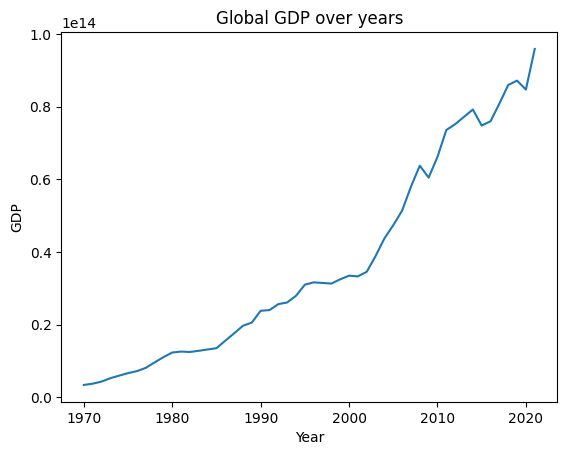

In [134]:
plt.plot(temp.year, temp.gross_domestic_product)
plt.title('Global GDP over years')
plt.xlabel('Year')
plt.ylabel('GDP')

#### Countries with Highest GDP (since 1970)

In [135]:
temp = df.groupby('country').sum().reset_index()
temp.sort_values(by='gross_domestic_product', ascending=False, inplace=True)
temp = temp.head(10)
temp

,country,countryid,year,ama_exchange_rate,imf_based_exchange_rate,population,currency,per_capita_gni,agriculture_hunting_forestry_fishing,changes_in_inventories,...,household_consumption_expenditure,imports_of_goods_and_services,manufacturing,mining_manufacturing_utilities,other_activities,total_value_added,transport_storage_and_communication,wholesale_retail_trade_restaurants_and_hotels,gross_national_income,gross_domestic_product
207,United States,43680,103766,52.000000,52.000000,13939980724,US Dollar US Dollar US Dollar US Dollar U...,1670211,5.443724e+12,1.375762e+12,...,3.221350e+14,6.762648e+13,6.609200e+13,8.420200e+13,2.551830e+14,4.844600e+14,4.712400e+13,7.244200e+13,4.894400e+14,4.847100e+14
99,Japan,20384,103766,8395.352215,8395.352215,6371455093,Yen Yen Yen Yen Yen Yen Yen Yen Yen ...,1443562,2.789346e+12,2.476038e+11,...,9.646088e+13,2.229256e+13,3.991029e+13,4.533913e+13,7.232681e+13,1.769470e+14,1.690160e+13,2.839374e+13,1.813520e+14,1.777220e+14
40,China,8112,103766,275.851173,275.851173,61410691450,Yuan Renminbi Yuan Renminbi Yuan Renminbi ...,127986,1.732472e+13,3.014475e+12,...,6.745422e+13,3.431321e+13,4.587200e+13,6.227289e+13,5.185065e+13,1.750194e+14,1.254850e+13,1.924127e+13,1.745764e+14,1.753894e+14
78,Germany,14352,103766,52.139161,52.139161,4171561406,Euro Euro Euro Euro Euro Euro Euro Eur...,1360336,1.096671e+12,4.250801e+11,...,5.979200e+13,3.512469e+13,2.307310e+13,2.639397e+13,4.592458e+13,9.858300e+13,8.277233e+12,1.174247e+13,1.104100e+14,1.089870e+14
206,United Kingdom,42952,103766,31.250169,31.250169,3093376501,Pound Sterling Pound Sterling Pound Sterlin...,1285348,6.603712e+11,1.818461e+11,...,5.113239e+13,2.230945e+13,9.368921e+12,1.276040e+13,3.740569e+13,7.206000e+13,7.167455e+12,9.762917e+12,7.898400e+13,7.878500e+13
73,France,13000,103766,44.612682,44.612682,3105162682,Euro Euro Euro Euro Euro Euro Euro Eur...,1279495,1.628241e+12,4.195274e+11,...,4.269167e+13,2.102247e+13,9.864457e+12,1.177320e+13,3.663916e+13,7.016900e+13,6.682470e+12,9.406131e+12,7.961700e+13,7.838200e+13
97,Italy,19760,103766,37.394837,37.394837,2982801636,Euro Euro Euro Euro Euro Euro Euro Eur...,1068561,1.618477e+12,8.371173e+10,...,3.721008e+13,1.508406e+13,1.049905e+13,1.211157e+13,2.567032e+13,5.649900e+13,5.110351e+12,8.930204e+12,6.237700e+13,6.242300e+13
26,Brazil,3952,103766,68.206829,68.206829,8375955159,Brazilian Real Brazilian Real Brazilian Rea...,229892,2.316851e+12,6.605545e+10,...,2.758815e+13,5.425306e+12,6.108230e+12,8.147014e+12,1.813527e+13,3.860588e+13,2.707385e+12,5.190122e+12,4.279497e+13,4.394010e+13
35,Canada,6448,103766,63.503439,63.503439,1531574941,Canadian Dollar Canadian Dollar Canadian Do...,1320866,9.166577e+11,1.304637e+11,...,2.434787e+13,1.370038e+13,5.421127e+12,8.980498e+12,1.953016e+13,4.051726e+13,3.088362e+12,5.209629e+12,4.256406e+13,4.346223e+13
91,India,18512,103766,1716.933701,1716.933701,50834467214,Indian Rupee Indian Rupee Indian Rupee Ind...,36143,8.145270e+12,5.990544e+11,...,2.610953e+13,9.262505e+12,6.675241e+12,8.740149e+12,1.264723e+13,3.939089e+13,2.560514e+12,4.176617e+12,4.280195e+13,4.323789e+13


Text(0.5, 1.0, 'Top 10 Countries with Highest Total GDP (since 1970)')

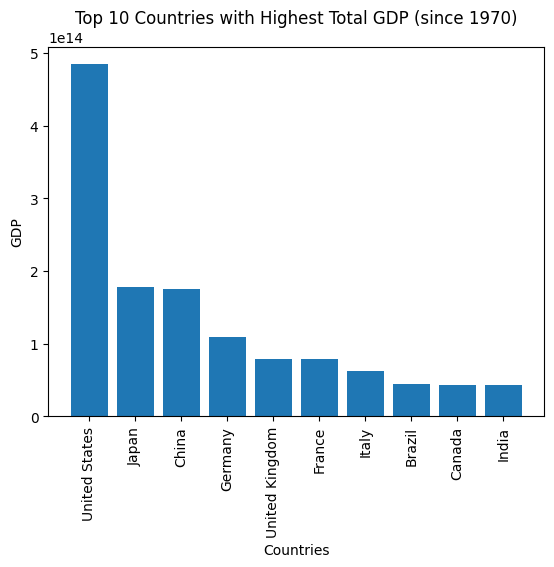

In [136]:
plt.bar(temp.country, temp.gross_domestic_product)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('GDP')
plt.title('Top 10 Countries with Highest Total GDP (since 1970)')

#### Countries with Highest GDP in 2021

In [137]:
temp = df[df.year==2021]
temp.sort_values(by='gross_domestic_product', ascending=False, inplace=True)
temp = temp.head(10)
temp

/var/folders/1x/4jzt2bnn0wl4t1hcdxs6nf6h0000gn/T/ipykernel_26406/2174063144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.sort_values(by='gross_domestic_product', ascending=False, inplace=True)


,countryid,country,year,ama_exchange_rate,imf_based_exchange_rate,population,currency,per_capita_gni,agriculture_hunting_forestry_fishing,changes_in_inventories,...,household_consumption_expenditure,imports_of_goods_and_services,manufacturing,mining_manufacturing_utilities,other_activities,total_value_added,transport_storage_and_communication,wholesale_retail_trade_restaurants_and_hotels,gross_national_income,gross_domestic_product
10144,840,United States,2021,1.000000,1.000000,336997624,US Dollar,70081,2.070000e+11,-1.909100e+10,...,1.590000e+13,3.400000e+12,2.500000e+12,3.270000e+12,1.290000e+13,2.330000e+13,2.490000e+12,3.520000e+12,2.360000e+13,2.330000e+13
1999,156,China,2021,6.448975,6.448975,1425893465,Yuan Renminbi,12324,1.350000e+12,1.710000e+11,...,6.800000e+12,3.060000e+12,4.870000e+12,5.780000e+12,5.970000e+12,1.770000e+13,1.410000e+12,1.990000e+12,1.760000e+13,1.770000e+13
4680,392,Japan,2021,109.754324,109.754324,124612530,Yen,41162,5.141133e+10,-4.100977e+09,...,2.660000e+12,9.360000e+11,9.950000e+11,1.150000e+12,2.210000e+12,4.910000e+12,4.910000e+11,7.330000e+11,5.130000e+12,4.940000e+12
3484,276,Germany,2021,0.845494,0.845494,83408554,Euro,52885,3.624035e+10,5.914056e+10,...,2.100000e+12,1.780000e+12,8.030000e+11,9.260000e+11,1.870000e+12,3.850000e+12,3.670000e+11,4.380000e+11,4.410000e+12,4.260000e+12
4212,356,India,2021,73.918013,73.918013,1407563842,Indian Rupee,2239,5.380000e+11,2.951508e+10,...,1.910000e+12,7.650000e+11,4.470000e+11,5.960000e+11,1.040000e+12,2.890000e+12,1.710000e+11,3.060000e+11,3.150000e+12,3.200000e+12
10008,826,United Kingdom,2021,0.727065,0.727065,67281039,Pound Sterling,46338,2.113154e+10,1.140063e+10,...,1.890000e+12,8.990000e+11,2.750000e+11,3.810000e+11,1.600000e+12,2.810000e+12,2.760000e+11,3.580000e+11,3.120000e+12,3.130000e+12
3140,250,France,2021,0.845494,0.845494,66875883,Euro,45535,4.851482e+10,2.332009e+10,...,1.560000e+12,9.290000e+11,2.630000e+11,3.440000e+11,1.470000e+12,2.620000e+12,2.830000e+11,3.280000e+11,3.050000e+12,2.960000e+12
4524,380,Italy,2021,0.845494,0.845494,59240329,Euro,36216,4.066734e+10,-3.742190e+08,...,1.220000e+12,6.390000e+11,3.140000e+11,3.800000e+11,9.250000e+11,1.890000e+12,1.670000e+11,2.830000e+11,2.150000e+12,2.110000e+12
1635,124,Canada,2021,1.253877,1.253877,38155012,Canadian Dollar,51741,3.529815e+10,-2.449204e+09,...,1.080000e+12,6.090000e+11,1.960000e+11,3.360000e+11,9.630000e+11,1.850000e+12,1.440000e+11,2.350000e+11,1.970000e+12,1.990000e+12
4920,410,Republic of Korea,2021,1143.951667,1143.951667,51830139,Won,35329,3.240994e+10,9.406341e+09,...,8.360000e+11,6.960000e+11,4.610000e+11,4.940000e+11,7.300000e+11,1.650000e+12,1.430000e+11,1.580000e+11,1.830000e+12,1.810000e+12


Text(0.5, 1.0, 'Top 10 Countries with Highest Total GDP (in 2021)')

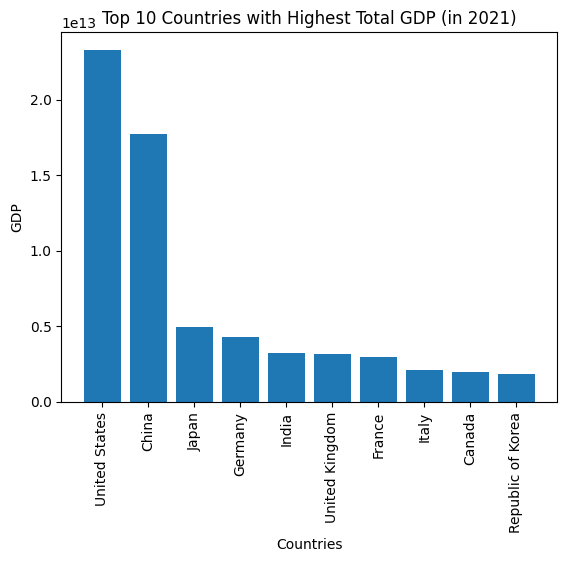

In [138]:
plt.bar(temp.country, temp.gross_domestic_product)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('GDP')
plt.title('Top 10 Countries with Highest Total GDP (in 2021)')

#### Highest Growth since 1970

In [139]:
temp = df[['country','year', 'gross_domestic_product']]
temp.head()

,country,year,gross_domestic_product
0,Afghanistan,1970,1.731436e+09
1,Afghanistan,1971,1.812838e+09
2,Afghanistan,1972,1.647900e+09
3,Afghanistan,1973,1.702716e+09
4,Afghanistan,1974,2.061729e+09


In [140]:
temp = temp.pivot(index='country', columns='year', values='gross_domestic_product')
temp.head()

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.731436e+09,1.812838e+09,1.647900e+09,1.702716e+09,2.061729e+09,2.319754e+09,2.513581e+09,2.864939e+09,3.222964e+09,3.630768e+09,...,1.913650e+10,1.962180e+10,1.955070e+10,1.871305e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.493901e+10
Albania,2.265577e+09,2.330585e+09,2.397526e+09,2.466543e+09,2.537016e+09,2.610110e+09,2.685746e+09,2.760746e+09,2.842276e+09,2.372306e+09,...,1.231978e+10,1.277628e+10,1.322824e+10,1.138692e+10,1.186136e+10,1.301973e+10,1.515644e+10,1.540183e+10,1.513187e+10,1.826004e+10
Algeria,5.155121e+09,5.363676e+09,7.176428e+09,9.229622e+09,1.325976e+10,1.555555e+10,1.775003e+10,2.099094e+10,2.637376e+10,3.320143e+10,...,2.090000e+11,2.100000e+11,2.140000e+11,1.660000e+11,1.600000e+11,1.700000e+11,1.750000e+11,1.720000e+11,1.460000e+11,1.630000e+11
Andorra,9.947679e+07,1.131285e+08,1.435060e+08,1.908638e+08,2.360555e+08,2.785143e+08,2.875884e+08,3.213901e+08,3.897459e+08,5.207423e+08,...,3.188830e+09,3.192603e+09,3.267334e+09,2.788758e+09,2.894646e+09,3.000160e+09,3.218419e+09,3.155152e+09,2.890998e+09,3.324648e+09
Angola,3.806982e+09,4.007445e+09,4.102155e+09,5.016276e+09,5.626961e+09,4.147433e+09,3.980907e+09,4.344225e+09,4.845482e+09,5.380155e+09,...,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,1.010000e+11,8.313674e+10,5.482108e+10,7.053324e+10


In [141]:
temp['net_growth'] = (((temp[2021] - temp[1970]) / temp[1970]) * 100)
temp['net_growth'].head()

country
Afghanistan     762.810581
Albania         705.977596
Algeria        3061.904654
Andorra        3242.134009
Angola         1752.733785
Name: net_growth, dtype: float64

In [142]:
temp = temp.sort_values(by='net_growth', ascending=False).head(10)
temp

year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,net_growth
country,,,,,,,,,,,,,,,,,,,,,
Equatorial Guinea,2.097234e+07,2.177715e+07,2.083104e+07,2.649886e+07,2.817291e+07,3.487829e+07,3.623199e+07,4.014032e+07,4.545562e+07,5.139979e+07,...,2.194255e+10,2.173660e+10,1.317552e+10,1.124081e+10,1.220091e+10,1.309701e+10,1.141728e+10,1.002186e+10,1.243085e+10,59172.623653
United Arab Emirates,1.067267e+09,1.462298e+09,2.201610e+09,4.267683e+09,1.176896e+10,1.491311e+10,1.946429e+10,2.519703e+10,2.408643e+10,3.163362e+10,...,3.900000e+11,4.030000e+11,3.580000e+11,3.570000e+11,3.860000e+11,4.220000e+11,4.170000e+11,3.570000e+11,4.050000e+11,37847.404680
Qatar,5.389356e+08,7.135427e+08,1.030064e+09,1.503055e+09,1.935095e+09,2.469524e+09,3.206311e+09,3.509457e+09,3.931750e+09,5.632963e+09,...,1.990000e+11,2.060000e+11,1.620000e+11,1.520000e+11,1.610000e+11,1.830000e+11,1.760000e+11,1.440000e+11,1.800000e+11,33299.166926
Oman,2.684094e+08,3.153238e+08,3.841880e+08,5.058512e+08,1.723549e+09,2.195593e+09,2.680976e+09,2.870460e+09,2.870763e+09,3.910653e+09,...,8.993613e+10,9.269912e+10,7.871088e+10,7.512885e+10,8.085658e+10,9.150592e+10,8.806095e+10,7.590940e+10,8.819198e+10,32757.258935
Botswana,6.679733e+07,8.811232e+07,1.146934e+08,1.694335e+08,2.355129e+08,2.740911e+08,2.969631e+08,3.828308e+08,4.559128e+08,5.945731e+08,...,1.427174e+10,1.547009e+10,1.353073e+10,1.508264e+10,1.610515e+10,1.703194e+10,1.669598e+10,1.493002e+10,1.761486e+10,26270.604089
Singapore,1.920574e+09,2.271576e+09,2.951929e+09,4.230382e+09,5.265532e+09,5.789525e+09,6.072182e+09,6.703780e+09,8.063852e+09,9.722066e+09,...,3.080000e+11,3.150000e+11,3.080000e+11,3.190000e+11,3.430000e+11,3.770000e+11,3.750000e+11,3.450000e+11,3.970000e+11,20570.901991
Republic of Korea,9.005144e+09,9.903571e+09,1.086221e+10,1.387647e+10,1.954397e+10,2.178430e+10,2.990248e+10,3.844649e+10,5.197211e+10,6.694690e+10,...,1.370000e+12,1.480000e+12,1.470000e+12,1.500000e+12,1.620000e+12,1.720000e+12,1.650000e+12,1.640000e+12,1.810000e+12,19999.623053
China,9.260262e+10,9.980058e+10,1.140000e+11,1.390000e+11,1.440000e+11,1.630000e+11,1.540000e+11,1.750000e+11,2.190000e+11,2.640000e+11,...,9.570000e+12,1.050000e+13,1.110000e+13,1.120000e+13,1.230000e+13,1.390000e+13,1.430000e+13,1.470000e+13,1.770000e+13,19013.930497
Cayman Islands,3.107420e+07,3.891036e+07,5.174419e+07,6.751909e+07,7.884025e+07,9.405429e+07,1.122042e+08,1.338566e+08,1.596872e+08,1.905025e+08,...,4.405796e+09,4.562854e+09,4.708168e+09,4.909325e+09,5.166281e+09,5.530179e+09,5.943375e+09,5.608787e+09,5.808612e+09,18592.716379


Text(0.5, 1.0, 'Top 10 Countries with Highest Growth between 1970 and 2021')

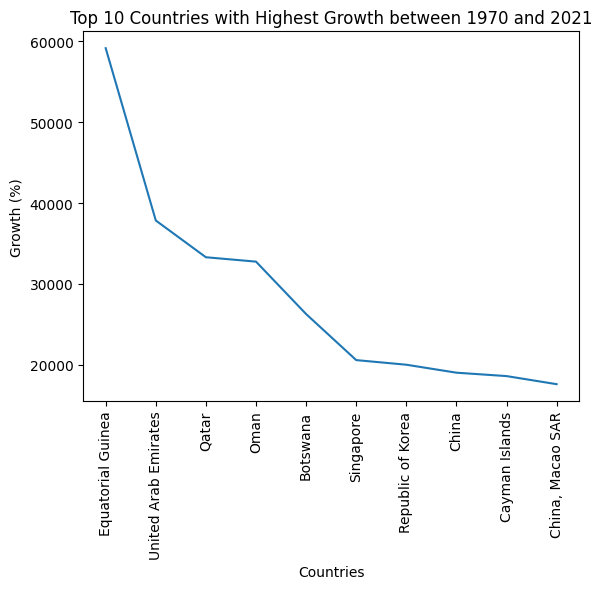

In [143]:
plt.plot(temp.reset_index().country, temp.net_growth)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Growth (%)')
plt.title('Top 10 Countries with Highest Growth between 1970 and 2021')

#### Lowest Growth since 1970

In [144]:
temp = df[['country','year', 'gross_domestic_product']]
temp.head()

,country,year,gross_domestic_product
0,Afghanistan,1970,1.731436e+09
1,Afghanistan,1971,1.812838e+09
2,Afghanistan,1972,1.647900e+09
3,Afghanistan,1973,1.702716e+09
4,Afghanistan,1974,2.061729e+09


Text(0.5, 1.0, 'Top 10 Countries with Lowest Growth between 1970 and 2021')

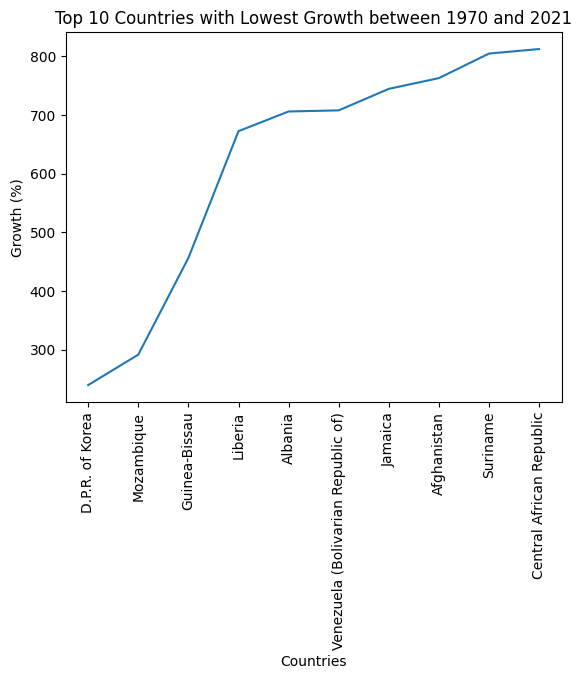

In [145]:
temp = temp.pivot(index='country', columns='year', values='gross_domestic_product')
temp['net_growth'] = (((temp[2021] - temp[1970]) / temp[1970]) * 100)
temp = temp.sort_values(by='net_growth', ascending=True).head(10)
plt.plot(temp.reset_index().country, temp.net_growth)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Growth (%)')
plt.title('Top 10 Countries with Lowest Growth between 1970 and 2021')

#### GDP Per Capita (in 2021)

In [146]:
temp = df[['country', 'year', 'population', 'gross_domestic_product']]
temp = temp[temp.year == 2021]
temp.head()

,country,year,population,gross_domestic_product
51,Afghanistan,2021,40099462,1.493901e+10
103,Albania,2021,2854710,1.826004e+10
155,Algeria,2021,44177969,1.630000e+11
207,Andorra,2021,79034,3.324648e+09
259,Angola,2021,34503774,7.053324e+10


In [147]:
temp['gdp_per_capita'] = temp['gross_domestic_product'] / temp['population']
temp_highest = temp.sort_values(by='gdp_per_capita', ascending=False).head(10)
temp_lowest = temp.sort_values(by='gdp_per_capita', ascending=True).head(10)

Text(0.5, 1.0, 'Countries with Highest GDP Per Capita')

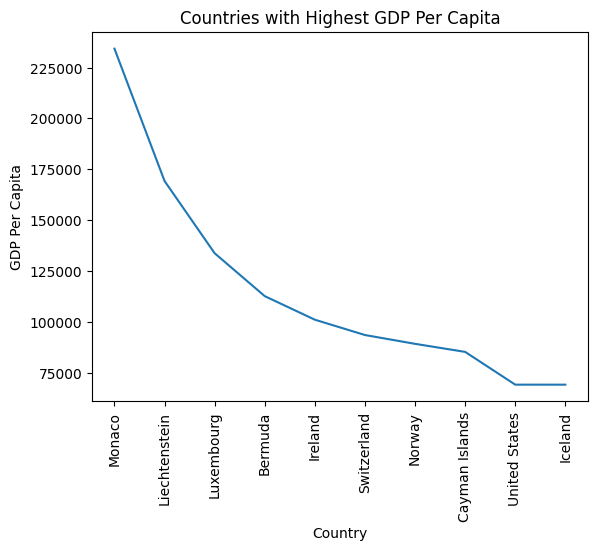

In [148]:
plt.plot(temp_highest.country, temp_highest.gdp_per_capita)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP Per Capita')
plt.title('Countries with Highest GDP Per Capita')

Text(0.5, 1.0, 'Countries with Lowest GDP Per Capita')

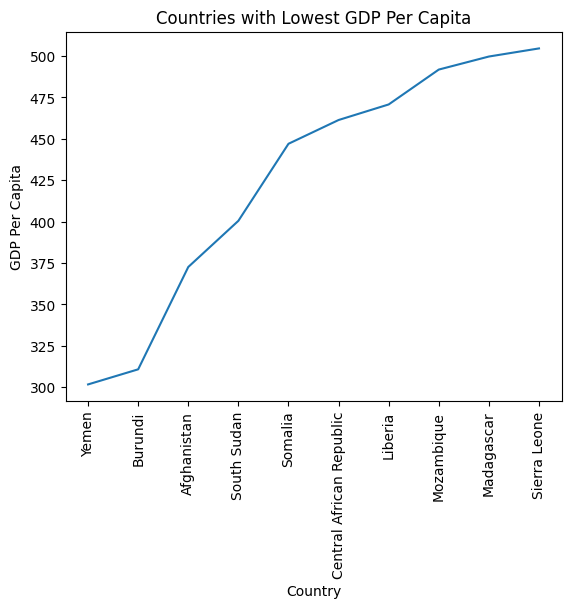

In [149]:
plt.plot(temp_lowest.country, temp_lowest.gdp_per_capita)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP Per Capita')
plt.title('Countries with Lowest GDP Per Capita')

#### Manufacturing Analysis

In [150]:
temp = df[['country', 'year', 'manufacturing', 'gross_domestic_product']]
temp = temp[temp.year == 2021]
temp.head()

,country,year,manufacturing,gross_domestic_product
51,Afghanistan,2021,1.353586e+09,1.493901e+10
103,Albania,2021,1.137449e+09,1.826004e+10
155,Algeria,2021,7.028517e+09,1.630000e+11
207,Andorra,2021,1.351044e+08,3.324648e+09
259,Angola,2021,4.613059e+09,7.053324e+10


Text(0.5, 1.0, 'Countries with Highest Manufacturing Capital (in 2021)')

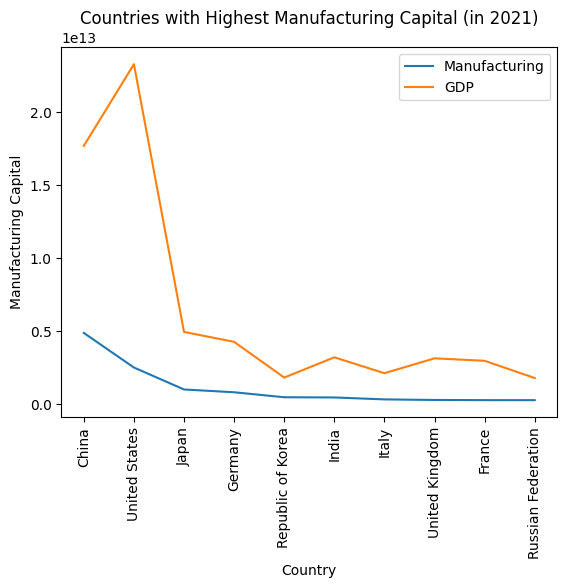

In [151]:
temp = temp.sort_values(by='manufacturing', ascending=False).head(10)
plt.plot(temp.country, temp.manufacturing, label='Manufacturing')
plt.plot(temp.country, temp.gross_domestic_product, label='GDP')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Manufacturing Capital')
plt.title('Countries with Highest Manufacturing Capital (in 2021)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'France'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'Republic of Korea'),
  Text(8, 0, 'India'),
  Text(9, 0, 'Brazil')])

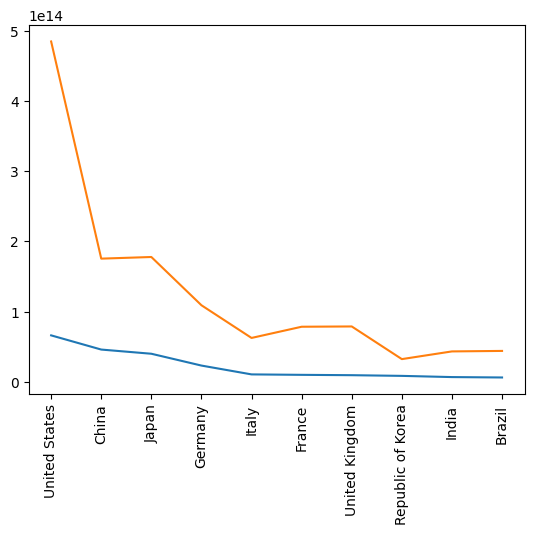

In [152]:
temp = df[['country', 'year', 'manufacturing', 'gross_domestic_product']]
temp = temp.groupby('country').sum().reset_index()
temp = temp.sort_values(by='manufacturing', ascending=False).head(10)
plt.plot(temp.country, temp.manufacturing)
plt.plot(temp.country, temp.gross_domestic_product)
plt.xticks(rotation=90)

#### Import and Export Trends

In [153]:
df.exports_of_goods_and_services.describe(), df.imports_of_goods_and_services.describe()

(count    1.049100e+04
 mean     4.671176e+10
 std      1.748857e+11
 min     -1.669759e+09
 25%      4.026725e+08
 50%      2.407906e+09
 75%      1.542492e+10
 max      3.530000e+12
 Name: exports_of_goods_and_services, dtype: float64,
 count    1.047000e+04
 mean     4.591504e+10
 std      1.804351e+11
 min      1.982159e+06
 25%      5.891469e+08
 50%      2.891919e+09
 75%      1.602312e+10
 max      3.400000e+12
 Name: imports_of_goods_and_services, dtype: float64)

In [154]:
df['net_import'] = abs(df.imports_of_goods_and_services - df.exports_of_goods_and_services)

In [155]:
(df[df.exports_of_goods_and_services < 0])['exports_of_goods_and_services']

2452   -2.766518e+08
2453   -3.888868e+08
2454   -6.633286e+08
2455   -5.864807e+08
2456   -3.935280e+08
2468   -1.669759e+09
Name: exports_of_goods_and_services, dtype: float64

In [156]:
df.exports_of_goods_and_services.isna().sum()

21

In [157]:
df.imports_of_goods_and_services.describe()

count    1.047000e+04
mean     4.591504e+10
std      1.804351e+11
min      1.982159e+06
25%      5.891469e+08
50%      2.891919e+09
75%      1.602312e+10
max      3.400000e+12
Name: imports_of_goods_and_services, dtype: float64

In [158]:
df['net_import'] = df.imports_of_goods_and_services - df.exports_of_goods_and_services.abs()

In [159]:
positive_temp = df[df.year == 2021].sort_values(by='net_import', ascending=False).head(10)
negative_temp = df[df.year == 2021].sort_values(by='net_import', ascending=False).tail(10)

<Axes: ylabel='country'>

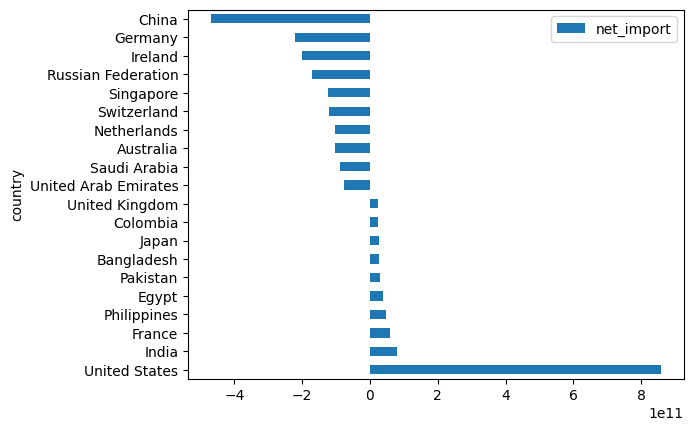

In [160]:
net_temp = pd.concat([positive_temp[['country', 'net_import']], negative_temp[['country', 'net_import']]])
net_temp.plot(kind='barh', x='country')

<Axes: xlabel='country'>

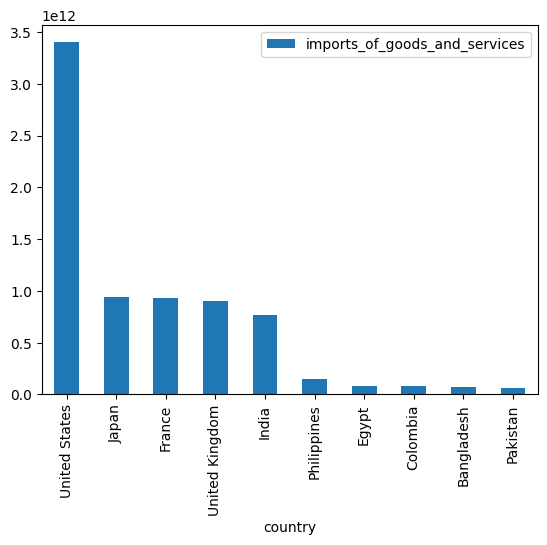

In [161]:
positive_temp[['country', 'imports_of_goods_and_services']].sort_values(by='imports_of_goods_and_services', ascending=False).plot(kind='bar', x='country')

<Axes: xlabel='country'>

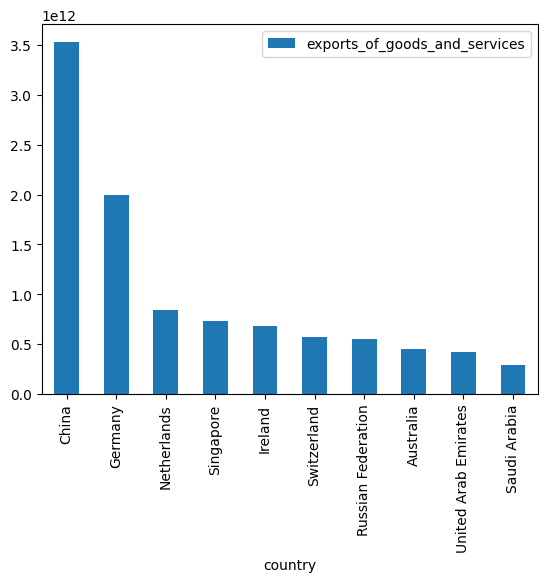

In [162]:
negative_temp[['country', 'exports_of_goods_and_services']].sort_values(by='exports_of_goods_and_services', ascending=False).plot(kind='bar', x='country')

#### Correlation with GDP

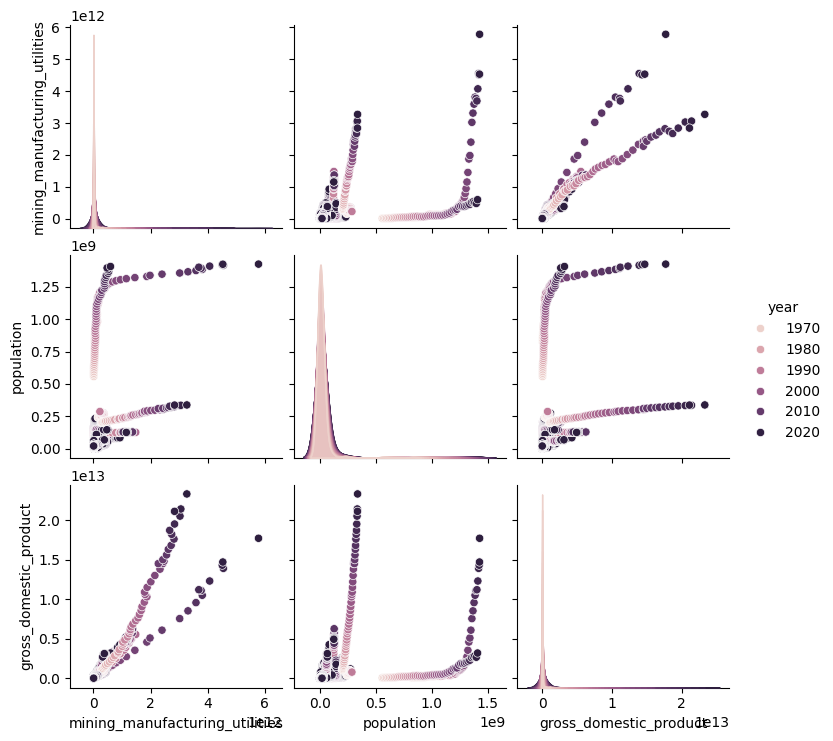

In [163]:
sns.pairplot(data=df, vars=['mining_manufacturing_utilities','population','gross_domestic_product'], hue='year')


In [164]:
df.select_dtypes(exclude='object').corr()

,countryid,year,ama_exchange_rate,imf_based_exchange_rate,population,per_capita_gni,agriculture_hunting_forestry_fishing,changes_in_inventories,construction,exports_of_goods_and_services,...,imports_of_goods_and_services,manufacturing,mining_manufacturing_utilities,other_activities,total_value_added,transport_storage_and_communication,wholesale_retail_trade_restaurants_and_hotels,gross_national_income,gross_domestic_product,net_import
countryid,1.000000,0.004589,0.040756,0.050318,-0.038065,-0.023477,-0.017593,-0.001989,0.035664,0.032475,...,0.043207,0.030098,0.032408,0.063569,0.055412,0.065072,0.067432,0.054088,0.053765,0.064848
year,0.004589,1.000000,0.132353,0.145939,0.042080,0.305795,0.110370,0.116141,0.130370,0.215305,...,0.202709,0.105664,0.119786,0.111194,0.120456,0.119171,0.118735,0.124329,0.125543,-0.031529
ama_exchange_rate,0.040756,0.132353,1.000000,0.948164,0.033661,-0.059089,0.047473,0.168148,0.002702,0.004733,...,0.005027,0.001164,0.008098,-0.009718,-0.001541,-0.002436,-0.002577,-0.002315,-0.001771,0.002731
imf_based_exchange_rate,0.050318,0.145939,0.948164,1.000000,0.036559,-0.067830,0.047215,0.143466,0.002432,0.003662,...,0.003667,-0.000565,0.006260,-0.012210,-0.003638,-0.004447,-0.004356,-0.004487,-0.003951,0.001063
population,-0.038065,0.042080,0.033661,0.036559,1.000000,-0.037545,0.755600,0.543288,0.471531,0.410848,...,0.394584,0.567431,0.507549,0.300156,0.395885,0.337009,0.349314,0.394570,0.398581,-0.021220
per_capita_gni,-0.023477,0.305795,-0.059089,-0.067830,-0.037545,1.000000,0.038678,0.073341,0.205279,0.321035,...,0.305083,0.171474,0.182326,0.216991,0.209380,0.215119,0.211625,0.215390,0.215710,-0.033341
agriculture_hunting_forestry_fishing,-0.017593,0.110370,0.047473,0.047215,0.755600,0.038678,1.000000,0.727473,0.741896,0.648240,...,0.610523,0.798985,0.791745,0.469736,0.610226,0.524601,0.538369,0.605072,0.611148,-0.097970
changes_in_inventories,-0.001989,0.116141,0.168148,0.143466,0.543288,0.073341,0.727473,1.000000,0.594934,0.590554,...,0.558178,0.655725,0.664687,0.414485,0.520043,0.456250,0.470941,0.518991,0.521899,-0.075969
construction,0.035664,0.130370,0.002702,0.002432,0.471531,0.205279,0.741896,0.594934,1.000000,0.873487,...,0.903168,0.968133,0.975032,0.902169,0.962501,0.930509,0.939464,0.961860,0.963885,0.297671
exports_of_goods_and_services,0.032475,0.215305,0.004733,0.003662,0.410848,0.321035,0.648240,0.590554,0.873487,1.000000,...,0.982382,0.866151,0.877442,0.805833,0.857040,0.828804,0.824476,0.865434,0.867135,0.065322


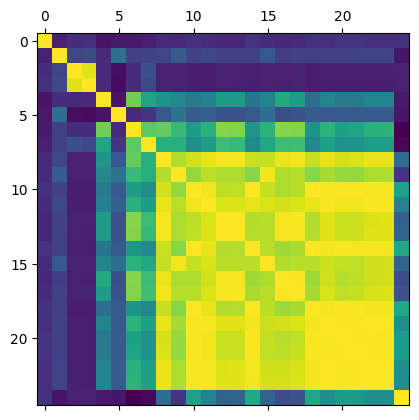

In [165]:
plt.matshow(df.select_dtypes(exclude='object').corr())

<Axes: >

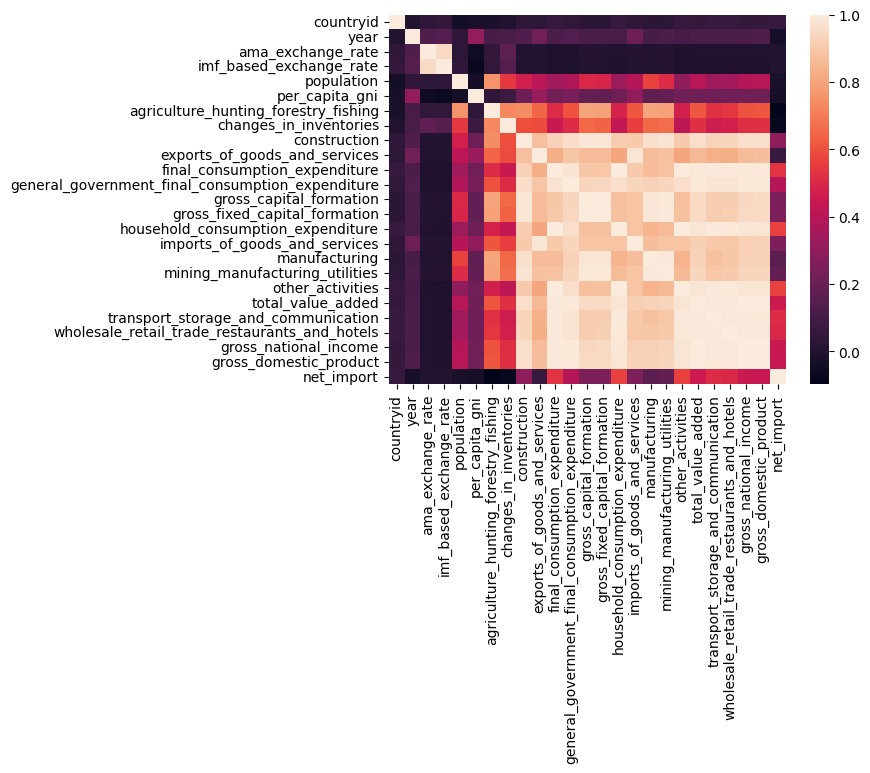

In [166]:
corr = df.select_dtypes(exclude='object').corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#### COVID Effect (?)

In [167]:
def plot_GDP_time(country):
    ax = df[df.country == country].plot(x='year', y='gross_domestic_product', title=f'GDP of {country} over years')
    ax.axvline(x=2019, color='red', linestyle='--',linewidth=1, label="COVID")
    ax.legend()

(None, None)

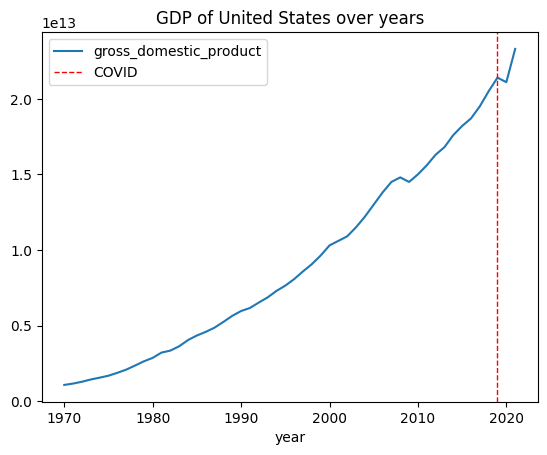

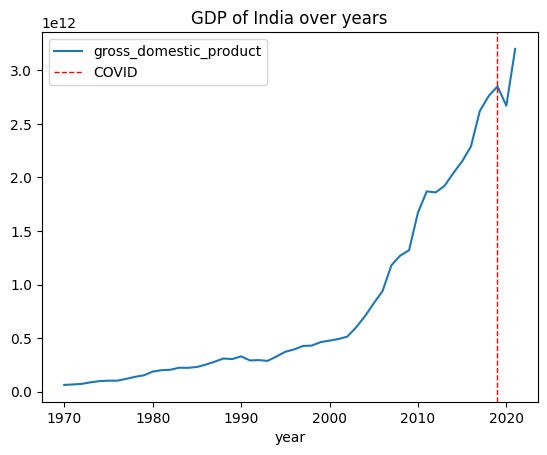

In [168]:
plot_GDP_time('United States'), plot_GDP_time('India') 

#### Population Change

In [169]:
base_year = df[df['year']==1970]['population'].values[0]
df['percent_change'] = ((df['population']-base_year)/base_year)*100
df.head()

,countryid,country,year,ama_exchange_rate,imf_based_exchange_rate,population,currency,per_capita_gni,agriculture_hunting_forestry_fishing,changes_in_inventories,...,manufacturing,mining_manufacturing_utilities,other_activities,total_value_added,transport_storage_and_communication,wholesale_retail_trade_restaurants_and_hotels,gross_national_income,gross_domestic_product,net_import,percent_change
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09,29658504.0,0.000000
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09,82716180.0,2.444775
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09,62715970.0,4.964042
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09,36049326.0,7.647505
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09,20740702.0,10.386971


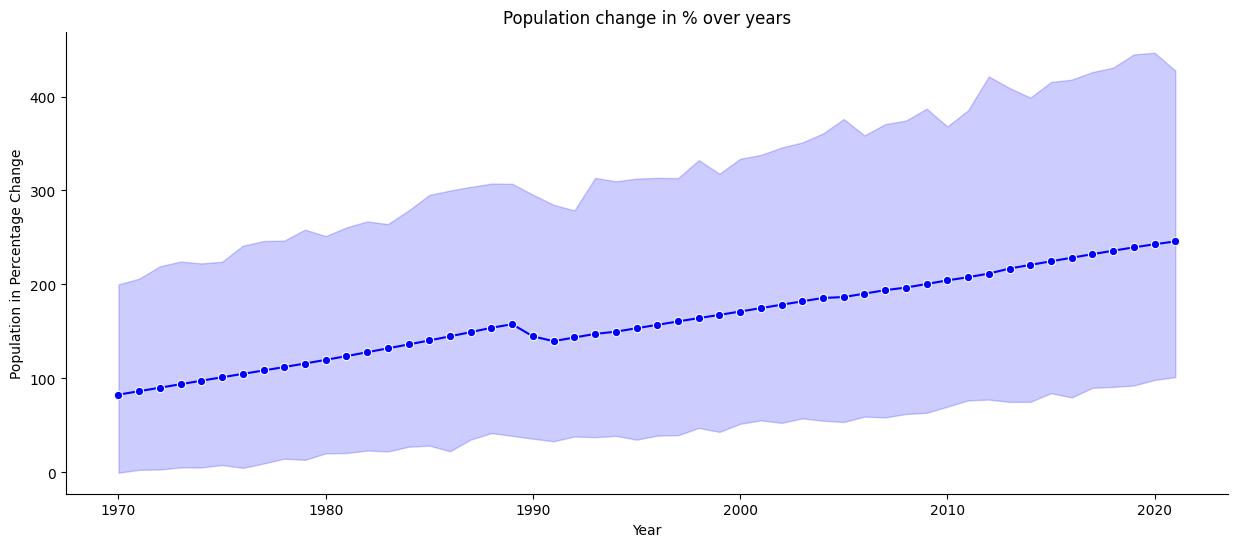

In [170]:
f,ax = plt.subplots(figsize=(15,6))
sns.despine(f)
sns.lineplot(x='year', y='percent_change', marker='o',color='blue',data=df)
plt.xlabel('Year')
plt.ylabel('Population in Percentage Change')
plt.title('Population change in % over years')
plt.show()

<Axes: xlabel='year', ylabel='per_capita_gni'>

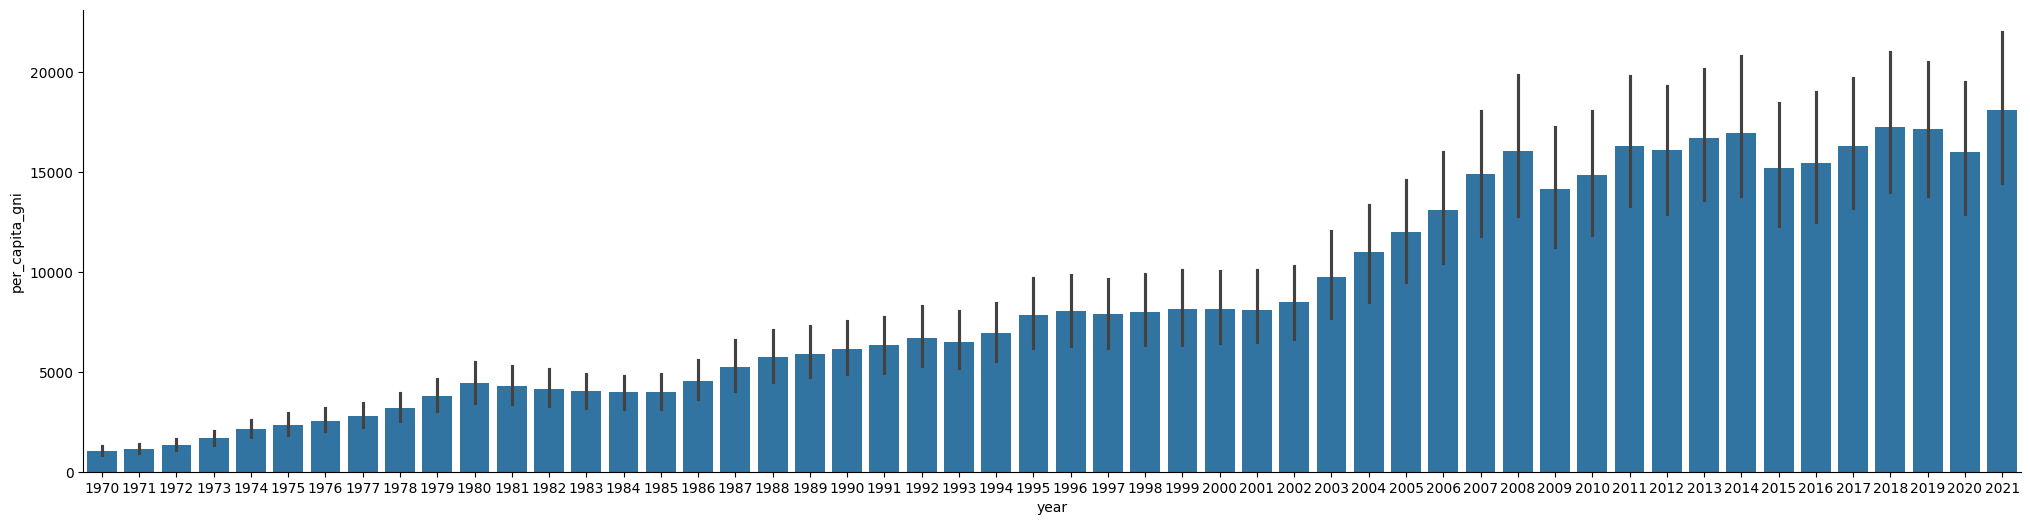

In [171]:
f,ax = plt.subplots(figsize=(25,6))
sns.despine(f)
sns.barplot(x='year',y='per_capita_gni',data=df)

## Hypothesis Testing

### Test of Normality

* H_0 : The GDP of the countries is normally distributed
* H_1 : The GDP of the countries is not normally distributed

#### 1. Shapiro-Wilk Test

- p < 0.05 => Probably Not Gaussian
- p > 0.05 => Probably Gaussian

In [172]:
from scipy.stats import shapiro, normaltest

stat, p = shapiro(df[df.year == 2021]['gross_domestic_product'])
p

2.977057970903825e-29

#### 2. D'Agostino's K^2 Test

- p < 0.05 => Probably Not Gaussian
- p > 0.05 => Probably Gaussian

In [173]:
stat, p = normaltest(df[df.year == 2021]['gross_domestic_product'])
p

1.174174110374496e-80

#### 3. Visual Inspection

(array([196.,   9.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([6.01701780e+07, 1.16505716e+12, 2.33005415e+12, 3.49505114e+12,
        4.66004814e+12, 5.82504513e+12, 6.99004212e+12, 8.15503911e+12,
        9.32003610e+12, 1.04850331e+13, 1.16500301e+13, 1.28150271e+13,
        1.39800241e+13, 1.51450211e+13, 1.63100181e+13, 1.74750150e+13,
        1.86400120e+13, 1.98050090e+13, 2.09700060e+13, 2.21350030e+13,
        2.33000000e+13]),
 <BarContainer object of 20 artists>)

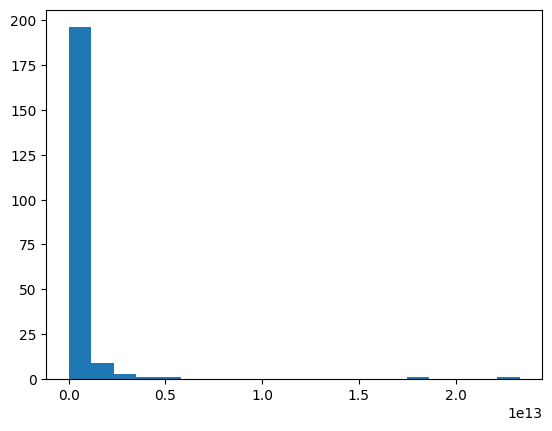

In [174]:
plt.hist(df[df.year == 2021]['gross_domestic_product'], bins=20)

In [175]:
df[(df.year == 2021) & (df.gross_domestic_product > 1e13)]['country']

1999             China
10144    United States
Name: country, dtype: object

(array([34., 13.,  7.,  7.,  7.,  9.,  7.,  9.,  5.,  2.,  3.,  3.,  4.,
         0.,  0.,  3.,  3.,  3.,  1.,  3.]),
 array([6.01701780e+07, 2.39152660e+09, 4.72288303e+09, 7.05423946e+09,
        9.38559588e+09, 1.17169523e+10, 1.40483087e+10, 1.63796652e+10,
        1.87110216e+10, 2.10423780e+10, 2.33737344e+10, 2.57050909e+10,
        2.80364473e+10, 3.03678037e+10, 3.26991601e+10, 3.50305166e+10,
        3.73618730e+10, 3.96932294e+10, 4.20245859e+10, 4.43559423e+10,
        4.66872987e+10]),
 <BarContainer object of 20 artists>)

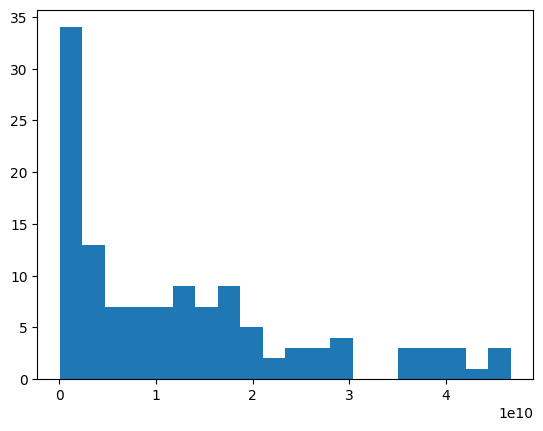

In [194]:
plt.hist(df[(df.year == 2021) & (df.gross_domestic_product < df.gross_domestic_product.quantile(0.75))]['gross_domestic_product'], bins=20)

(array([103.,  12.,   6.,   2.,   2.,   1.,   3.,   1.,   0.,   4.,   0.,
          3.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([6.01701780e+07, 4.07071617e+10, 8.13541532e+10, 1.22001145e+11,
        1.62648136e+11, 2.03295128e+11, 2.43942119e+11, 2.84589111e+11,
        3.25236102e+11, 3.65883094e+11, 4.06530085e+11, 4.47177077e+11,
        4.87824068e+11, 5.28471060e+11, 5.69118051e+11, 6.09765043e+11,
        6.50412034e+11, 6.91059026e+11, 7.31706017e+11, 7.72353009e+11,
        8.13000000e+11]),
 <BarContainer object of 20 artists>)

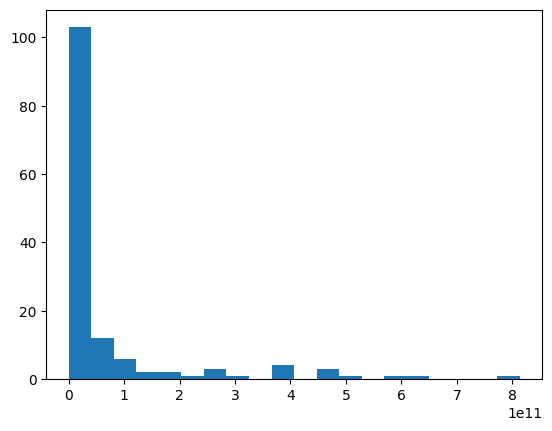

In [195]:
plt.hist(df[(df.year == 2021) & (df.population < df.population.quantile(0.75))]['gross_domestic_product'], bins=20)

### Correlation Tests

* H_0 : The GDP of the countries is correlated with the population
* H_1 : The GDP of the countries is not correlated with the population

#### 1. Pearson's Correlation Test

In [176]:
from scipy.stats import pearsonr

df_2021 = df[df.year == 2021]

stat, p = pearsonr(df_2021['population'], df_2021['gross_domestic_product'])
p

3.301928564978792e-22

In [177]:
from scipy.stats import spearmanr

stat, p = spearmanr(df_2021['population'], df_2021['gross_domestic_product'])
p

1.8483268855707745e-43

In [202]:
df[df.year==2000].country.nunique()

210